# 逻辑回归预测芯片质量通过

任务:

1、基于chip_test.csv数据，建立逻辑回归模型(二阶边界)，评估模型表现； 2、以函数的方式求解边界曲线 3、描绘出完整的决策边界曲线

常规步骤：
1. 读取数据并可视化
2. 预处理数据
3. 建立模型并预测
4. 分析准确率
5. 分析临界

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


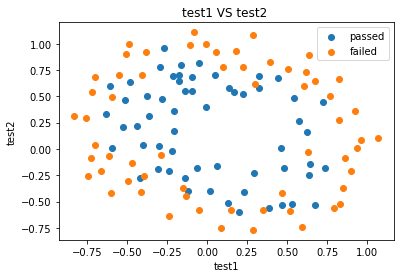

In [5]:
mask = data.loc[:,'pass']==1
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1 VS test2 ')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [9]:
x = data.drop(['pass'],axis=1)
y = data.loc[:,'pass']
x1 = data.loc[:,'test1']
x2 = data.loc[:,'test2']
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new.head())

         x1       x2      x1_2      x2_2     x1_x2
0  0.051267  0.69956  0.002628  0.489384  0.035864
1 -0.092742  0.68494  0.008601  0.469143 -0.063523
2 -0.213710  0.69225  0.045672  0.479210 -0.147941
3 -0.375000  0.50219  0.140625  0.252195 -0.188321
4  0.183760  0.93348  0.033768  0.871385  0.171536


In [10]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_new,y)

LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score
y2_predict = LR.predict(x_new)
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

0.8135593220338984


In [12]:
X1_range = [-0.9 + x/10000 for x in range(0,19000)]


0.9998999999999999